In [ ]:
! pip install tensorflow

In [1]:
!pip install kaggle

In [32]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘~p’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists


Importing the Dataset

In [74]:
#Kaggle Api
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [75]:
!ls

 dogs-vs-cats.zip  'image resized'  '~p'	   sampleSubmission.csv   train
 imageresize	    kaggle.json      sample_data   test1.zip		  train.zip


In [76]:
from zipfile import ZipFile
dataset='/content/dogs-vs-cats.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [77]:
from zipfile import ZipFile
dataset='/content/train.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [78]:
import os
#count files
path,dirs,files=next(os.walk('/content/train'))
file_count=len(files)
print("Number of images:",file_count)

Number of images: 25000


Name of the Images

In [79]:
file_names=os.listdir('/content/train/')
print(file_names)

['cat.4624.jpg', 'cat.2364.jpg', 'cat.1449.jpg', 'dog.7247.jpg', 'cat.635.jpg', 'cat.3877.jpg', 'cat.6013.jpg', 'cat.12459.jpg', 'dog.5586.jpg', 'cat.10732.jpg', 'dog.11877.jpg', 'dog.7902.jpg', 'cat.7195.jpg', 'dog.3587.jpg', 'cat.8508.jpg', 'dog.7225.jpg', 'cat.6285.jpg', 'dog.9900.jpg', 'cat.10723.jpg', 'dog.5987.jpg', 'dog.10149.jpg', 'dog.6532.jpg', 'dog.3443.jpg', 'cat.7340.jpg', 'cat.6676.jpg', 'dog.8255.jpg', 'cat.2762.jpg', 'cat.9537.jpg', 'cat.7171.jpg', 'dog.2052.jpg', 'cat.8372.jpg', 'dog.5048.jpg', 'dog.348.jpg', 'dog.10321.jpg', 'cat.4359.jpg', 'cat.11647.jpg', 'dog.9213.jpg', 'cat.10426.jpg', 'dog.578.jpg', 'dog.1443.jpg', 'dog.2158.jpg', 'cat.1978.jpg', 'dog.1382.jpg', 'cat.5677.jpg', 'cat.9560.jpg', 'cat.11292.jpg', 'dog.5755.jpg', 'dog.6156.jpg', 'cat.9868.jpg', 'cat.5990.jpg', 'dog.12005.jpg', 'dog.3158.jpg', 'cat.9480.jpg', 'cat.11424.jpg', 'cat.9401.jpg', 'dog.272.jpg', 'dog.566.jpg', 'cat.2474.jpg', 'dog.8223.jpg', 'cat.5714.jpg', 'dog.7889.jpg', 'cat.11190.jpg', 

Importing the dependencies

In [80]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

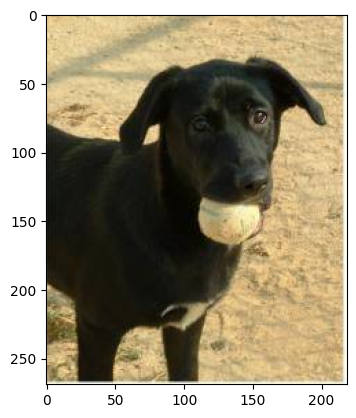

In [81]:
# displaying dog image
img=mpimg.imread('/content/train/dog.6794.jpg')
imgplt=plt.imshow(img)
plt.show()


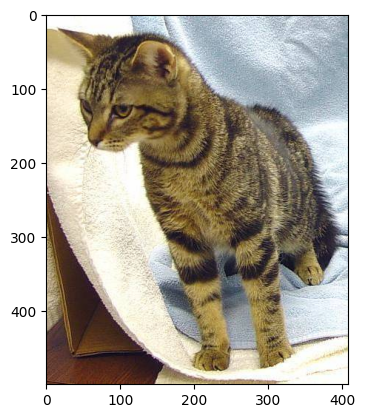

In [82]:
# displaying dog image
img2=mpimg.imread('/content/train/cat.4624.jpg')
imgplt2=plt.imshow(img2)
plt.show()

In [83]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])


cat
cat
cat
dog
cat


In [48]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [49]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [84]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  print(newImgPath)
  img.save(newImgPath)

/content/image resized/cat.4624.jpg
/content/image resized/cat.2364.jpg
/content/image resized/cat.1449.jpg
/content/image resized/dog.7247.jpg
/content/image resized/cat.635.jpg
/content/image resized/cat.3877.jpg
/content/image resized/cat.6013.jpg
/content/image resized/cat.12459.jpg
/content/image resized/dog.5586.jpg
/content/image resized/cat.10732.jpg
/content/image resized/dog.11877.jpg
/content/image resized/dog.7902.jpg
/content/image resized/cat.7195.jpg
/content/image resized/dog.3587.jpg
/content/image resized/cat.8508.jpg
/content/image resized/dog.7225.jpg
/content/image resized/cat.6285.jpg
/content/image resized/dog.9900.jpg
/content/image resized/cat.10723.jpg
/content/image resized/dog.5987.jpg
/content/image resized/dog.10149.jpg
/content/image resized/dog.6532.jpg
/content/image resized/dog.3443.jpg
/content/image resized/cat.7340.jpg
/content/image resized/cat.6676.jpg
/content/image resized/dog.8255.jpg
/content/image resized/cat.2762.jpg
/content/image resized/c

In [85]:
print(len(newImgPath))

35


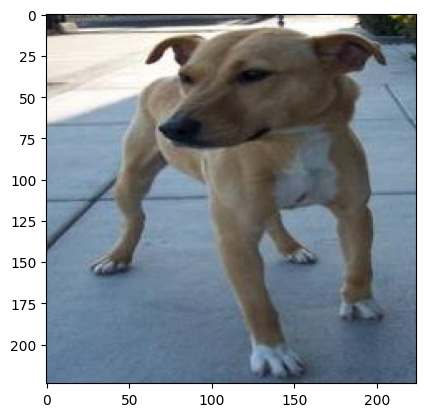

In [86]:
img = mpimg.imread('/content/image resized/dog.9610.jpg')
imgplt = plt.imshow(img)
plt.show()

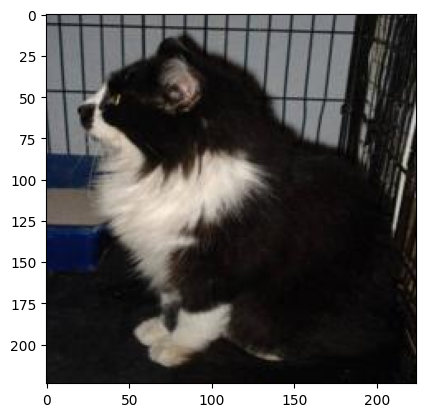

In [87]:
img = mpimg.imread('/content/image resized/cat.1449.jpg')
imgplt = plt.imshow(img)
plt.show()

Cat --> 0
Dog --> 1

In [88]:
filenames=os.listdir('/content/image resized/')
labels=[]
for i in range(2000):
  file_name=filenames[i]
  label=file_name[0:3]
  if label=='dog':
    labels.append(1)
  else:
    labels.append(0)


In [89]:
print(filenames[0:5])
print(len(filenames))

['cat.4624.jpg', 'cat.2364.jpg', 'cat.1449.jpg', 'dog.7247.jpg', 'cat.635.jpg']
2000


In [90]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 1, 0]
2000


In [91]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1003  997]


In [92]:
import cv2
import glob


In [94]:
image_directory='/content/image resized/'
image_extension=['png','jpg']
files=[]
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [64]:
print(dog_cat_images)

[[[[250 253 255]
   [250 253 255]
   [250 253 255]
   ...
   [196 186 169]
   [189 179 162]
   [178 168 151]]

  [[252 253 255]
   [252 253 255]
   [252 253 255]
   ...
   [183 173 156]
   [186 176 159]
   [187 177 160]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [183 173 156]
   [187 177 160]
   [191 181 164]]

  ...

  [[ 59  75 122]
   [ 58  74 121]
   [ 55  71 118]
   ...
   [252 254 254]
   [251 253 253]
   [251 253 253]]

  [[ 22  37  86]
   [ 22  37  86]
   [ 24  39  88]
   ...
   [251 253 253]
   [251 253 253]
   [251 253 253]]

  [[ 45  60 109]
   [ 41  56 105]
   [ 38  53 102]
   ...
   [251 253 253]
   [251 253 253]
   [251 253 253]]]


 [[[198 219 220]
   [191 212 213]
   [189 211 209]
   ...
   [187 195 195]
   [187 194 197]
   [187 194 197]]

  [[194 216 214]
   [189 211 209]
   [189 211 209]
   ...
   [187 194 197]
   [187 194 197]
   [187 194 197]]

  [[192 213 210]
   [189 210 207]
   [191 212 209]
   ...
   [188 194 199]
   [187 193 198]
   [187 193

In [95]:
type(dog_cat_images)

numpy.ndarray

In [96]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [97]:
X=dog_cat_images
Y=np.asarray(labels)

In [98]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=2)

In [100]:
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [101]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [102]:
print(X_train_scaled)

[[[[0.51764706 0.5254902  0.5254902 ]
   [0.51764706 0.5254902  0.5254902 ]
   [0.51764706 0.5254902  0.5254902 ]
   ...
   [0.51372549 0.52156863 0.5254902 ]
   [0.51372549 0.52156863 0.5254902 ]
   [0.51372549 0.52156863 0.5254902 ]]

  [[0.52156863 0.52941176 0.52941176]
   [0.52156863 0.52941176 0.52941176]
   [0.52156863 0.52941176 0.52941176]
   ...
   [0.51372549 0.52156863 0.5254902 ]
   [0.51372549 0.52156863 0.5254902 ]
   [0.51372549 0.52156863 0.5254902 ]]

  [[0.52156863 0.52941176 0.52941176]
   [0.52156863 0.52941176 0.52941176]
   [0.52156863 0.52941176 0.52941176]
   ...
   [0.51372549 0.52156863 0.5254902 ]
   [0.51372549 0.52156863 0.5254902 ]
   [0.51372549 0.52156863 0.5254902 ]]

  ...

  [[0.25098039 0.22745098 0.41176471]
   [0.24705882 0.23529412 0.41568627]
   [0.25098039 0.23921569 0.41960784]
   ...
   [0.39215686 0.36862745 0.41176471]
   [0.4        0.36862745 0.41176471]
   [0.33333333 0.30980392 0.35294118]]

  [[0.24313725 0.21568627 0.43921569]
   [0.2

In [103]:
import tensorflow as tf
import tensorflow_hub as hub


In [104]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [105]:
num_of_classes=2
model=tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])


In [106]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [107]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [108]:
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 76s 1s/step - loss: 0.2595 - acc: 0.8806
Epoch 2/5
50/50 [==============================] - 70s 1s/step - loss: 0.0659 - acc: 0.9781
Epoch 3/5
50/50 [==============================] - 61s 1s/step - loss: 0.0510 - acc: 0.9862
Epoch 4/5
50/50 [==============================] - 62s 1s/step - loss: 0.0370 - acc: 0.9925
Epoch 5/5
50/50 [==============================] - 64s 1s/step - loss: 0.0301 - acc: 0.9925


In [110]:
score,acc=model.evaluate(X_test_scaled,Y_test)
print('Test Loss=',score)
print('Test accuracy=',acc)

13/13 [==============================] - 17s 1s/step - loss: 0.0654 - acc: 0.9775
Test Loss= 0.0654141828417778
Test accuracy= 0.9775000214576721


Path of the image to be predicted: /content/dog.jpeg


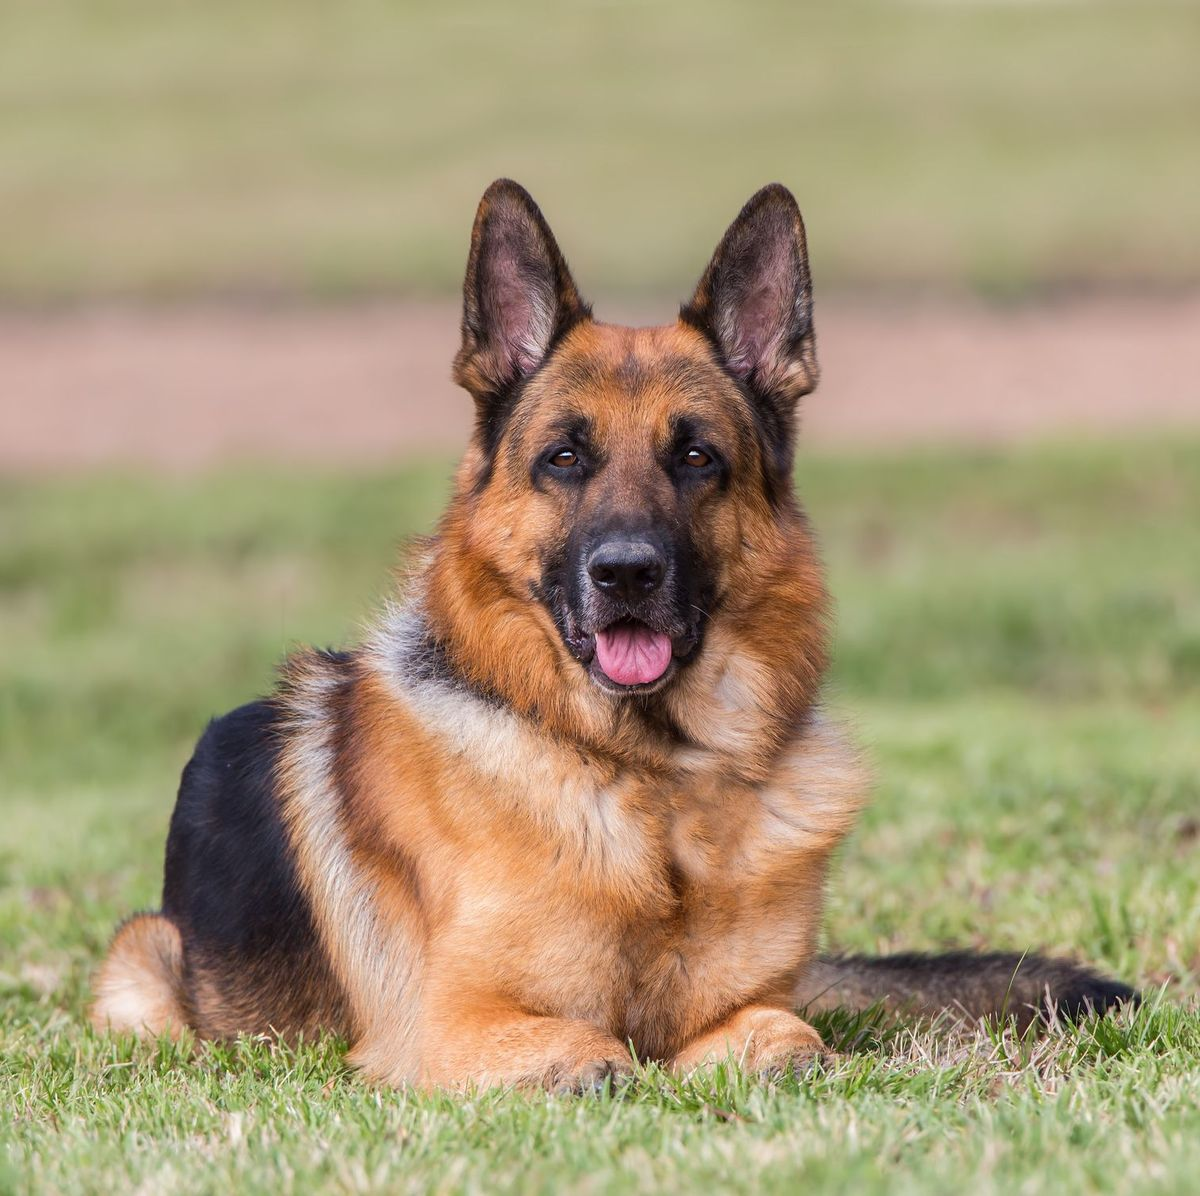

1/1 [==============================] - 1s 1s/step
[[-2.6793206  2.582078 ]]
1
The image represents a Dog


In [111]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat.jpg


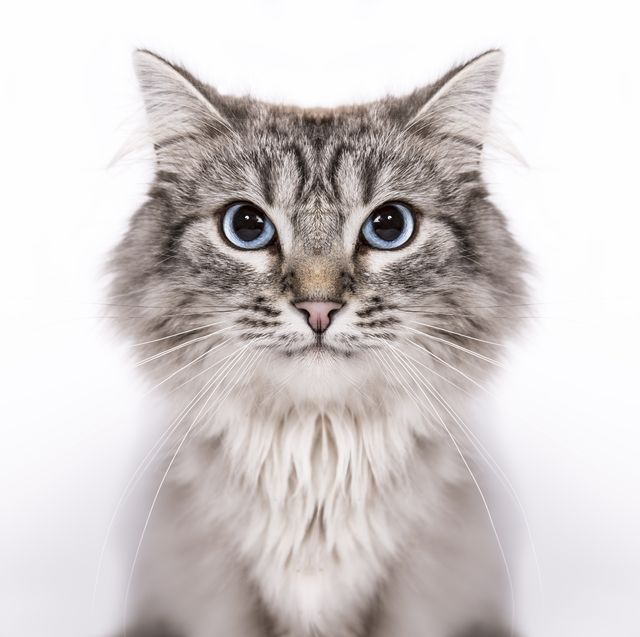

1/1 [==============================] - 0s 57ms/step
[[ 1.7457752 -3.7014108]]
0
The image represents a Cat


In [112]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/kyapata.jpg


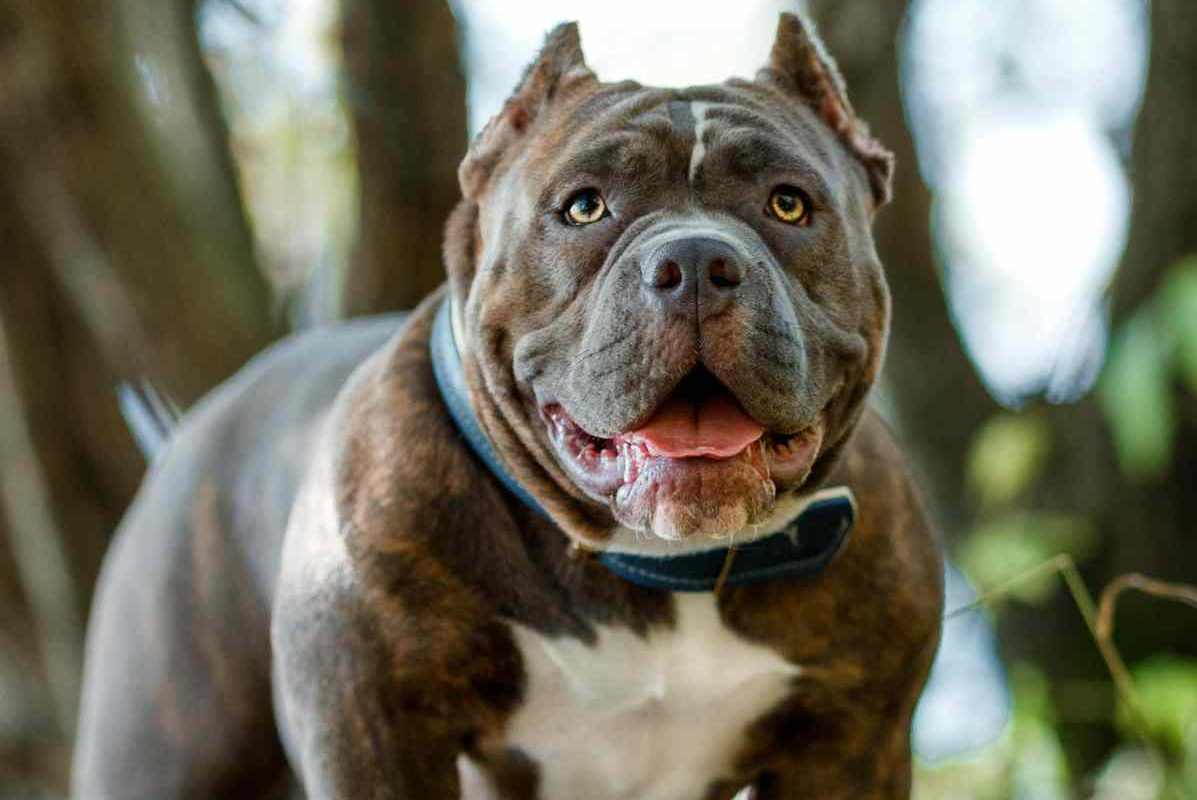

1/1 [==============================] - 0s 82ms/step
[[-2.653707   2.1803858]]
1
The image represents a Dog


In [113]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')